In [196]:
import numpy as np
from prettytable import PrettyTable
import matplotlib.pyplot as plt
from scipy.stats import norm, kstwobign, ksone, chi2

Варіант 22

In [197]:
var = 22
a = 0.05
xi = np.array([[var, var+1],
               [var+1, var+2],
               [var+2, var+3],
               [var+3, var+4],
               [var+4, var+5], 
               [var+5, var+6],
               [var+6, var+7],
               [var+7, var+8]])
mi = np.array([10, 8, 7, 10, 22, 18, 14, 11])

In [198]:
interval_count = xi.shape[0]

In [199]:
table = PrettyTable()
table.field_names = ["(x_i; x_i+1)", "m_i"]

for i in range(interval_count):
    table.add_row([
        f"({xi[i, 0]}; {xi[i, 1]})",
        mi[i]
    ])
table

(x_i; x_i+1),m_i
(22; 23),10
(23; 24),8
(24; 25),7
(25; 26),10
(26; 27),22
(27; 28),18
(28; 29),14
(29; 30),11


In [200]:
n = np.sum(mi)
print(f"n = {n}")

n = 100


In [201]:
k = interval_count - 2 - 1
print(f'k = {k}')

k = 5


In [202]:
h = xi[0][1] - xi[0][0]
print(f'h = {h}')

h = 1


In [203]:
midpoints = [start + h / 2 for start, end in xi]
table = PrettyTable()
table.field_names = ["Value", "Frequency"]
for i in range(len(midpoints)):
    table.add_row([f"{midpoints[i]}", mi[i]])
table

Value,Frequency
22.5,10
23.5,8
24.5,7
25.5,10
26.5,22
27.5,18
28.5,14
29.5,11


In [204]:
def laplace_function(x):
    return norm.cdf(x) - 0.5

In [205]:
x_b = np.sum(midpoints * mi) / n
print(f'x_b = {x_b}')

x_b = 26.41


In [206]:
d = np.sum(np.power(midpoints, 2) * mi) / n - np.power(x_b, 2)
print(f'D_b = {d:.4f}')

D_b = 4.4219


In [207]:
sigma = np.sqrt(d)
print(f'sigma = {sigma:.4f}')

sigma = 2.1028


H0 = {випадкова величина X має нормальний закон розподілу за допомогою критерію Пірсона}

In [208]:
x = np.unique(xi.ravel())

In [209]:
x_1 = np.copy(x)
x_1 = np.delete(x_1, 0)
x = np.delete(x, len(x)-1)

z = np.array([])
for i  in range(len(x)):
    if i == 0:
        continue
    z = np.append(z, (x[i] - x_b) / sigma)

laplas = np.array([laplace_function(i) for i in z])
laplas = np.concatenate([[-0.5], laplas, [0.5]])

p = np.array([])
for i in range(len(x)):
    p = np.append(p, laplas[i+1] - laplas[i])

In [210]:
table = PrettyTable()
table.field_names = ["i", "x_i", "x_i+1", "z_i", "z_i+1", "Ф(z_i)", "Ф(z_i+1)", "P_i"]
for i in range(len(x)):
    table.add_row([
        i+1,
        x[i],
        x_1[i],
        "-inf" if i == 0 else z[i-1].round(4),
        "+inf" if i == len(x)-1 else z[i].round(4),
        laplas[i].round(4),
        laplas[i+1].round(4),
        p[i].round(4)
    ])

table.add_row(["-",
               "-",
               "-",
               "-",
               "-",
               "-",
               "Сума",
               round(np.sum(p), 4)
               ])

table

i,x_i,x_i+1,z_i,z_i+1,Ф(z_i),Ф(z_i+1),P_i
1,22,23,-inf,-1.6216,-0.5,-0.4476,0.0524
2,23,24,-1.6216,-1.1461,-0.4476,-0.3741,0.0734
3,24,25,-1.1461,-0.6705,-0.3741,-0.2487,0.1254
4,25,26,-0.6705,-0.195,-0.2487,-0.0773,0.1714
5,26,27,-0.195,0.2806,-0.0773,0.1105,0.1878
6,27,28,0.2806,0.7561,0.1105,0.2752,0.1647
7,28,29,0.7561,1.2317,0.2752,0.391,0.1158
8,29,30,1.2317,+inf,0.391,0.5,0.109
-,-,-,-,-,-,Сума,1.0


In [211]:
n_p = np.array([pi * n for pi in p])

sub_n = []
for i in range(len(mi)):
    sub_n.append(mi[i]-n_p[i])

sub_n2 = []
for i in sub_n:
    sub_n2.append(np.pow(i, 2))

frac_sub_n2 = []
for i in range(len(sub_n2)):
    frac_sub_n2.append(sub_n2[i] / n_p[i])

In [212]:
table = PrettyTable()
table.field_names = ["i",
                     "n_i",
                     "n*_i",
                     "n_i-n*_i",
                     "(n_i - n*_i)^2",
                     "(n_i - n*_i)^2 / n*_i"]

for i in range(len(n_p)):
    table.add_row([i+1,
                   mi[i],
                   round(n_p[i], 4),
                   round(sub_n[i], 4),
                   round(sub_n2[i], 4),
                   round(frac_sub_n2[i], 4)
                   ])
table.add_row(["Сума",
               np.sum(mi),
               np.sum(n_p),
               "-",
               "-",
               round(np.sum(frac_sub_n2), 4)
               ])

table

i,n_i,n*_i,n_i-n*_i,(n_i - n*_i)^2,(n_i - n*_i)^2 / n*_i
1,10,5.2442,4.7558,22.6176,4.3129
2,8,7.344,0.656,0.4303,0.0586
3,7,12.5379,-5.5379,30.6688,2.4461
4,10,17.1444,-7.1444,51.0431,2.9772
5,22,18.7775,3.2225,10.3843,0.553
6,18,16.4731,1.5269,2.3314,0.1415
7,14,11.5752,2.4248,5.8797,0.508
8,11,10.9036,0.0964,0.0093,0.0009
Сума,100,100.0,-,-,10.9981


In [214]:
x_2 = np.sum(frac_sub_n2)
print(f'X^2 спост. = {round(x_2, 4)}')

X^2 спост. = 10.9981


In [215]:
critical_value = chi2.ppf(1-a, k)
print(f"Критичне значення χ^2 при α={a} та k={k}: {critical_value:.4f}")

Критичне значення χ^2 при α=0.05 та k=5: 11.0705


In [216]:
if x_2 < critical_value:
    print("Оскільки χ^2 спост < χ^2 кр, гіпотезу про нормальний розподіл генеральної сукупності не відхиляємо")
else: 
    print("Оскільки χ^2 спост > χ^2 кр, гіпотезу про нормальний розподіл генеральної сукупності  відхиляємо")

Оскільки χ^2 спост < χ^2 кр, гіпотезу про нормальний розподіл генеральної сукупності не відхиляємо


H0 = {випадкова величина X має нормальний закон розподілу за допомогою критерію Колмогорова}

In [218]:
x = np.unique(xi.ravel())

In [219]:
def kolmogorov_crit(n, a):
    dist = ksone(n)
    return dist.ppf(1 - a/2)

In [220]:
def kolmogorov_p(x):
    return 1 - kstwobign.cdf(x)

In [221]:
def kolmogorov_crit_points(a):
    return kstwobign.ppf(1 - a)

In [222]:
empir_func = np.array([0])
sum_func = 0

for i in mi:
    sum_func += i
    empir_func = np.append(empir_func, sum_func/n)

In [223]:
proximal = np.array([(i - x_b) / sigma for i in x])

In [224]:
theoretical_func = np.array([0.5 + laplace_function(i) for i in proximal])

In [225]:
difference = np.array(abs(theoretical_func - empir_func))
difference = np.append(difference, 0)

In [226]:
table = PrettyTable()
table.field_names = ["i",
                     "x_i",
                     "x_i+1",
                     "n_i",
                     "F*(x_i)",
                     "(x_i+1 - x_b) / sigma",
                     "F(x_i)",
                     "|F*(x_i) - F(x_i)|"]

for i in range(len(x)+1):
    table.add_row([i+1,
                   "-inf" if i == 0 else x[i-1],
                   "+inf" if i == len(x) else x[i],
                   1 if i == len(x) else mi[i-1],
                   empir_func[i-1] if i == len(x) else empir_func[i],
                   "inf" if i == len(x) else f"{proximal[i]:.4f}",
                   1 if i == len(x) else f"{theoretical_func[i]:.4f}",
                   0 if i == len(x) else f"{difference[i]:.6f}"
                   ])
table

i,x_i,x_i+1,n_i,F*(x_i),(x_i+1 - x_b) / sigma,F(x_i),|F*(x_i) - F(x_i)|
1,-inf,22,11,0.0,-2.0972,0.0180,0.017989
2,22,23,10,0.1,-1.6216,0.0524,0.047558
3,23,24,8,0.18,-1.1461,0.1259,0.054118
4,24,25,7,0.25,-0.6705,0.2513,0.001262
5,25,26,10,0.35,-0.1950,0.4227,0.072706
6,26,27,22,0.57,0.2806,0.6105,0.040481
7,27,28,18,0.75,0.7561,0.7752,0.025212
8,28,29,14,0.89,1.2317,0.8910,0.000964
9,29,30,11,1.0,1.7072,0.9561,0.043890
10,30,+inf,1,1.0,inf,1,0


In [227]:
d = np.max(difference).round(6)
print(f"D* max|F*(x) - F(x)| = {d:.4f}")

D* max|F*(x) - F(x)| = 0.0727


In [228]:
lambda_observed = d * np.sqrt(n)
lambda_crit = kolmogorov_crit_points(a)

print(f"λ спост. : {lambda_observed}")
print(f"Критичне значення для α={a}: {lambda_crit:.4f}")

λ спост. : 0.72706
Критичне значення для α=0.05: 1.3581


In [229]:
if lambda_observed < lambda_crit:
    print("Оскільки λ спост. < λ крит, то нульова гіпотеза про рівномірний закон розподілу генеральної сукупності не відкидається")
else:
    print("Оскільки λ спост. > λ крит, то нульова гіпотеза про рівномірний закон розподілу генеральної сукупності відкидається")

Оскільки λ спост. < λ крит, то нульова гіпотеза про рівномірний закон розподілу генеральної сукупності не відкидається


In [230]:
p = kolmogorov_p(lambda_observed)
print(f"P({lambda_observed}) = {p:.5f}")

P(0.72706) = 0.66584


In [234]:
if p  < a:
    print(f"Дана ймовірність β є мала і оскільки {p.round(4)} < a = {a},"
          f" то розбіжність між емпіричним і теоретичним розподілами не є випадковою")
else:
    print(f"Дана ймовірність β є велика і оскільки {p.round(4)} > a = {a},"
          f" то розбіжність між емпіричним і теоретичним розподілами може бути випадковою "
          f"і дані розподіли можна вважати узгодженими")

Дана ймовірність β є велика і оскільки 0.6658 > a = 0.05, то розбіжність між емпіричним і теоретичним розподілами може бути випадковою і дані розподіли можна вважати узгодженими


In [232]:
k_crit = kolmogorov_crit(n, a)
print(f"K({n}, {a}) = {k_crit:.3f}")
if d < k_crit:
    print(f"Оскільки D* < K({n}, {a}), то  то нульова гіпотеза не відкидається")
else:
    print(f"Оскільки D* > K({n}, {a}), то  то нульова гіпотеза відкидається")

K(100, 0.05) = 0.134
Оскільки D* < K(100, 0.05), то  то нульова гіпотеза не відкидається


H0 = {випадкова величина X має нормальний закон розподілу за допомогою графічної перевірки}

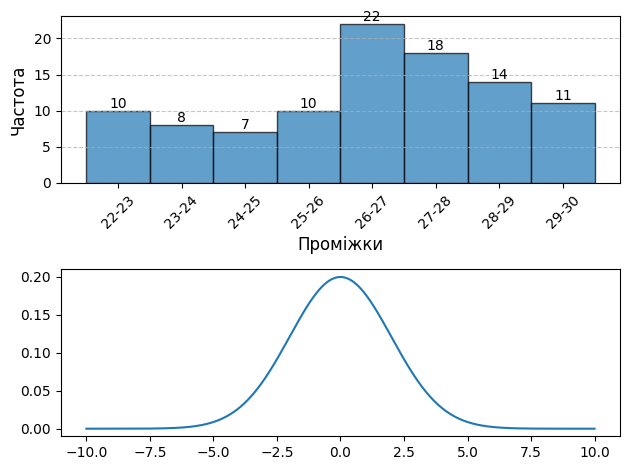

In [233]:
fig, axes = plt.subplots(2)

bars = axes[0].bar(midpoints, mi, width=h, edgecolor='black', alpha=0.7)

axes[0].set_xlabel("Проміжки", fontsize=12)
axes[0].set_ylabel('Частота', fontsize=12)
axes[0].set_xticks(midpoints, [f'{start}-{end}' for start, end in xi], rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width() / 2, height, f'{height}',
                 ha='center',
                 va='bottom',
                 fontsize=10)

x_axis = np.arange(-10, 10, 0.001)
axes[1].plot(x_axis, norm.pdf(x_axis, 0, 2))
plt.tight_layout()
plt.show()